In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import numpy as np
import rawpy
import imutils
from PIL import Image

import matplotlib.pyplot as plt

from photo.film import detect, show, crop, rotate, save

Image.MAX_IMAGE_PIXELS = None

# To dos
- Close rectangles (e.g., for very under-exposed areas near the edges of a frame)
  - See `epsilon` in `cv2.approxPolyDP`
- Add aspect ratio filter (area is not sufficient)


In [56]:
path = "/Users/dsuo/Downloads/2021-01-22-0001.jpg"
fmt = "35"

DPI = 6400
working_dpi = 400
scaling = DPI // working_dpi
image = Image.open(path)
im = np.array(image)
# rgb = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
# with rawpy.imread(path) as raw:
#     rgb = raw.postprocess()

In [39]:
im.shape

(61948, 37680, 3)

In [57]:
im = im[::scaling, ::scaling, :]

In [58]:
im.shape

(3872, 2355, 3)

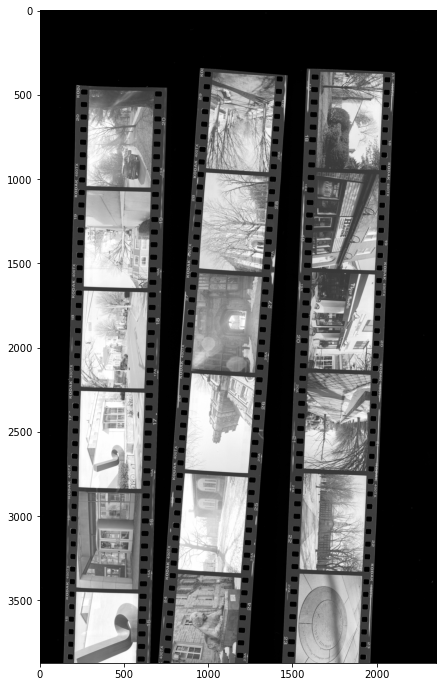

In [59]:
plt.figure(figsize=(16, 12))
plt.imshow(im)

In [60]:
paths, rotations = detect(im, fmt="35", area_threshold=0.1, dpi=working_dpi)

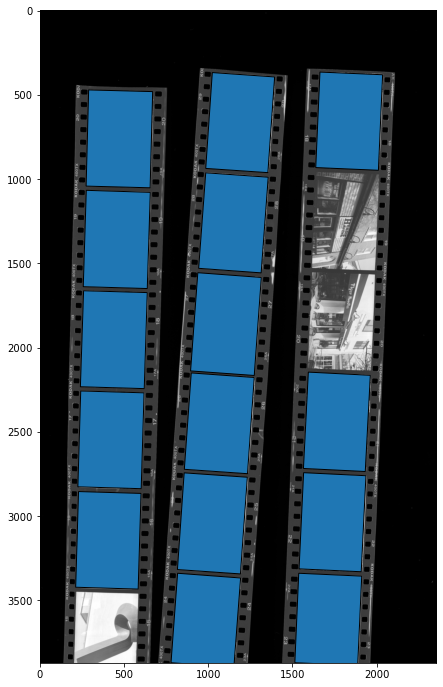

In [61]:
show(im, paths)

In [62]:
im = np.array(Image.open(path))

In [63]:
cropped = crop(im, [path * scaling for path in paths])

In [64]:
rotated = rotate(cropped, rotations)

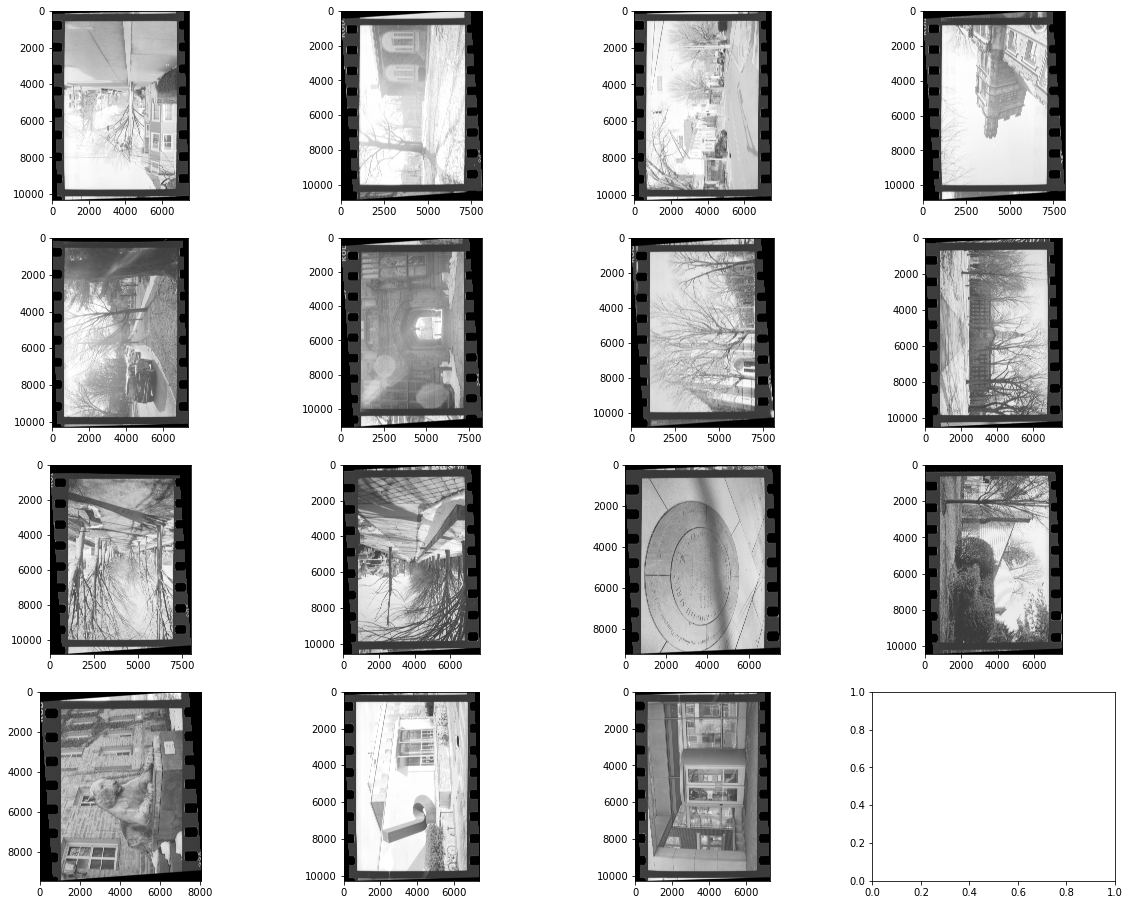

In [66]:
fig, axs = plt.subplots(len(rotated) // 4 + 1, 4, figsize=(20, 16))

for i, preview in enumerate(rotated):
    axs[i // 4, i % 4].imshow(preview, cmap="gray")

In [65]:
finals = []

for preview in rotated:
    p, r = detect(preview,  fmt="35", area_threshold=0.1, dpi=DPI)
    finals.append(crop(preview, p, width=36/25.4, height=24/25.4, pad=0.1, dpi=DPI)[0])

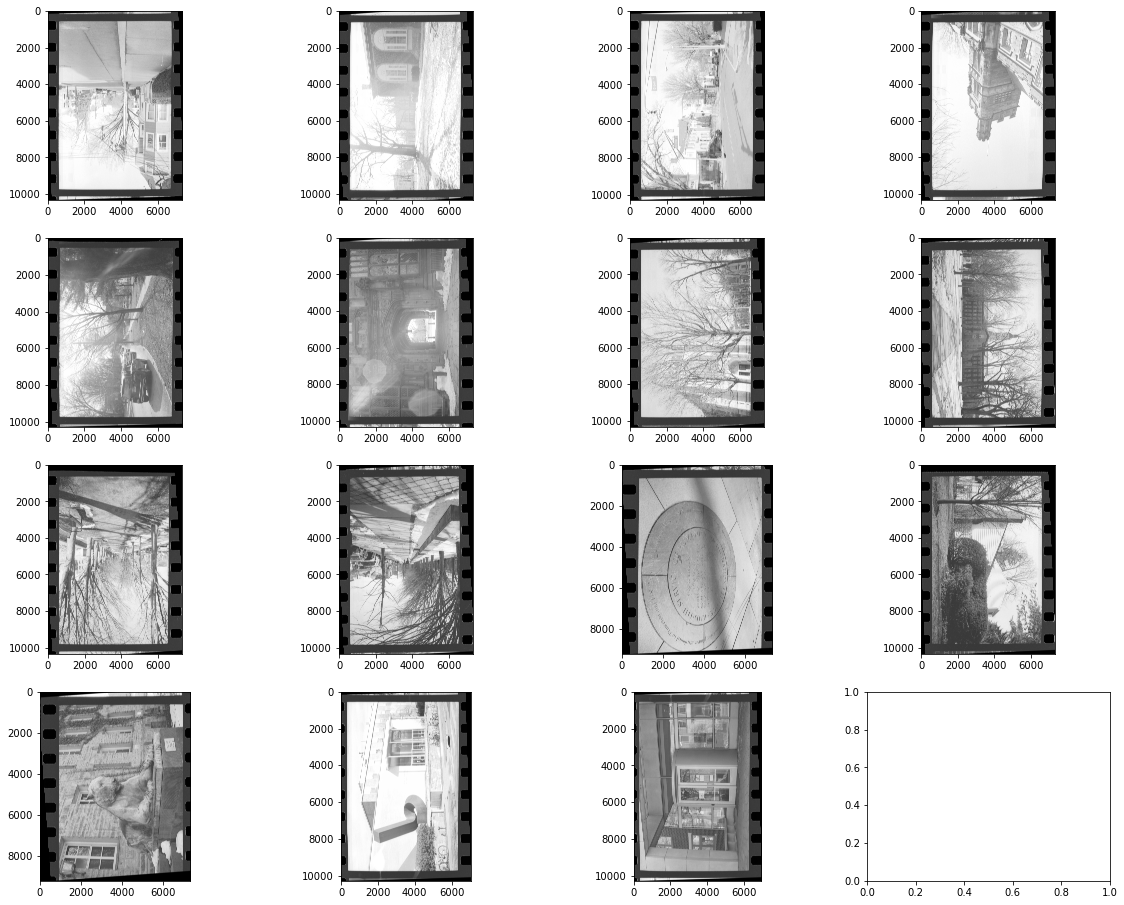

In [67]:
fig, axs = plt.subplots(len(finals) // 4 + 1, 4, figsize=(20, 16))

for i, final in enumerate(finals):
    axs[i // 4, i % 4].imshow(final, cmap="gray")

In [68]:
save(finals, "~/Downloads/test", format="jpeg")